# 1 | Eigenvalue Problem

In [24]:
import numpy as np
from scipy.io import mminfo,mmread
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.linalg import inv, eig
from numpy import sqrt, dot, sum, abs, diag, array

## Eigenvalue Problems

In order to test different algorithms to compute eigenvalues we use a 4x4 matrix with eigenvalues 1, 2, 3, and 4.
It is constructed as 
$$ A = S D S^{-1} $$
where $D$ is a diagonal matrix containing the EVs.

In [25]:
np.random.seed(1)
D = np.array([1, 2, 3, 4]) # EIGENVALUES
S = (np.random.rand(len(D),len(D)) - 0.5)*2 # compute a random matrix with entries between -1 and 1
A = np.dot(np.dot(S,np.diag(D)),inv(S)) # S*D*S^-1, computes a unitary similar matrix of D having the same EVs
D,S,A

(array([1, 2, 3, 4]),
 array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
        [-0.70648822, -0.81532281, -0.62747958, -0.30887855],
        [-0.20646505,  0.07763347, -0.16161097,  0.370439  ],
        [-0.5910955 ,  0.75623487, -0.94522481,  0.34093502]]),
 array([[ 4.00554954,  0.01354906,  1.19192526, -1.27636247],
        [ 2.77659659,  1.49989982,  3.16264938, -2.48173559],
        [ 1.45212322, -0.48865181,  6.86559345, -1.8724586 ],
        [ 4.12225091, -0.92237257,  9.49381671, -2.37104281]]))

### Vector Interation

* also known as power method, power iteration, or von Mises iteration
* yields largest (in magnitude) eigenvalue and corresponding eigenvector
* converges baldy if $\lambda_n/\lambda_{n-1} \approx 1$, i.e. the second largest EV is almost the same size as the largest

Use the recursion
$$ b_{k+1} = \frac{A b_k}{\lVert A b_k \rVert}$$

where $b_k$ converges to the eigenvector and ${\lVert A b_k \rVert}$ to the eigenvalue.

Hint: Depending on the eigenvalue the method might not converge to one fixed value. Try to implement a workaround in order to deal with the problem!

Current evaluation 0 --> 13.494287075225774
Current evaluation 1 --> 3.8923421594465695
Current evaluation 2 --> 3.614552826631208
Current evaluation 3 --> 3.654910499364184
Current evaluation 4 --> 3.762704545208437
Current evaluation 5 --> 3.862975312487751
Current evaluation 6 --> 3.9335469962764367
Current evaluation 7 --> 3.9756135798852528
Current evaluation 8 --> 3.9976324227962587
Current evaluation 9 --> 4.007617982928506

Largest eigenvalue found:
4.0

Corresponding eigenvecotor found:
[-0.5 -0.4  0.5  0.6]


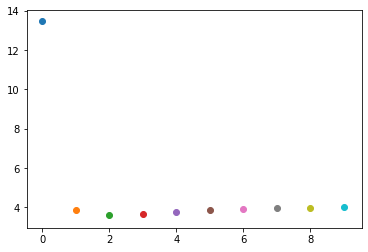

In [73]:
# eigenVal = vector_iter(A,10)

x = np.ones(len(A)) # one can start with any vector
    
for i in range(10) :
    # compute numerator
    num = np.dot(A,x)

    # compute denominator
    den = sum(abs(num)**2)**(1./2)
    #eigenVal = np.linalg.norm(num,2)

    # compute recursion
    x = num/den
    
    # plot the intermediate results (DEBUGGING)
    print('Current evaluation',i,'-->',den)
    plt.scatter(i, den)

print('\nLargest eigenvalue found:')
print(np.round_(den, decimals=1, out=None))

print('\nCorresponding eigenvecotor found:')
print(np.round_(x, decimals=1, out=None))

### Inverse Vector Iteration

If $\lambda$ is an eigenvalue of $A$, then $1/\lambda$ is an eigenvalue of $A^{-1}$.
Thus, we can do vector iteration on the inverse $A^{-1}$ to find the Eigenvalue with the smallest magnitude.
Thus, we have to compute the recursion
$$ y_k = A^{-1} x_k $$
which can be done by pre-factorising $A = LU$.

Current evaluation 0 --> 0.558365528631046
Current evaluation 1 --> 0.6207544440387353
Current evaluation 2 --> 0.8872586442640671
Current evaluation 3 --> 0.9632902755865219
Current evaluation 4 --> 0.9875404478461786
Current evaluation 5 --> 0.9956702927436427
Current evaluation 6 --> 0.9984664598730083
Current evaluation 7 --> 0.9994453940579879
Current evaluation 8 --> 0.9997942126045645
Current evaluation 9 --> 0.9999212025490571

Largest eigenvalue found:
1.0

Corresponding eigenvecotor found:
[-0.2 -0.7 -0.2 -0.6]


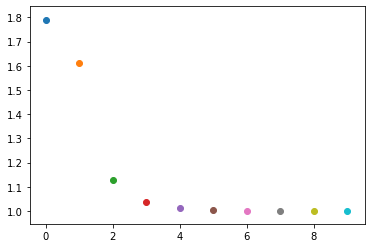

In [74]:
# TODO: implement own LU pre-factorising
# eigenVal = vector_iter(inv(A),10)'

x = np.ones(len(A)) # one can start with any vector
    
for i in range(10) :
    # compute numerator
    num = np.dot(inv(A),x)

    # compute denominator
    den = sum(abs(num)**2)**(1./2)

    # compute recursion
    x = num/den

    # plot the intermediate results
    print('Current evaluation',i,'-->',1/den)
    plt.scatter(i, den)

print('\nLargest eigenvalue found:')
print(np.round_(1/den, decimals=1, out=None))

print('\nCorresponding eigenvecotor found:')
print(np.round_(x, decimals=1, out=None))

### Inverse Vector Iteration with Shift

If $\lambda$ is an eigenvalue of $A$ then $\lambda-\sigma$ is an eigenvalue of $A-\sigma I$.
The eigenvalue of the inverse $(A-\sigma I)^{-1} = B$ will be $\mu = \frac{1}{\lambda-\sigma}$.
Thus, if $\lambda\approx\sigma$, vector iteration with B will yield the smallest (in magnitude) EV of A.

The iteration rule is then
$$ b_{k+1} = (A - \sigma I)^{-1} b_k \text{ or } (A - \sigma I) b_{k+1} = b_k $$

The series converges to the same eigenvectors, the eigenvalues $\mu$ are related to the original ones $\lambda$ via
$$ \lambda = \sigma + \frac{1}{\mu}$$

* $\sigma$ is called the shift point
* a linear system has to be solved in each step
* for a constant shift point the solution of the linear system corresponds to a matrix multiplication

> If you shift to exactly one eigenvalue $A-\sigma I$ becomes ill-conditioned!

Current evaluation 0 --> 2.3565113390406536
Current evaluation 1 --> 1.9949654524961131
Current evaluation 2 --> 2.003932404040147
Current evaluation 3 --> 1.999436794382986
Current evaluation 4 --> 2.0002598041227637
Current evaluation 5 --> 1.9998888391860403
Current evaluation 6 --> 2.0000431417548095
Current evaluation 7 --> 1.9999800088866169
Current evaluation 8 --> 2.0000080976247667
Current evaluation 9 --> 1.999996401973084

Eigenvalue found:
2.0

Corresponding eigenvecotor found:
[-0.37  0.68 -0.06 -0.63]


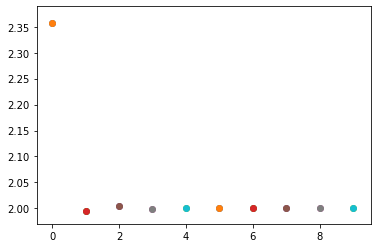

In [75]:
# choose shift point
sig = 1.7
B = inv(A-sig*np.diag(np.ones_like(D)))

#y = np.dot(Binv,np.ones_like(D)) # start value
x = np.ones(len(D))
for i in range(10) :
    # compute update
    num = np.dot(B,x)

    # compute denominator
    den = sum(abs(num)**2)**(1./2)
    
    # compute recursion
    x = num/den
    
    # Check sign
    eigV = np.dot(np.transpose(x),np.dot(B,x))/np.dot(np.transpose(x),x)
    
    # update lambda
    lamb = sig + 1/eigV
    
    # do fancy plot
    plt.scatter(i, lamb)
    
    # display some stuff & plot fancy
    print('Current evaluation',i,'-->',lamb)
    plt.scatter(i, lamb, marker='o')
    

print('\nEigenvalue found:')
print(np.round(sig+1/eigV, 2, out=None))

print('\nCorresponding eigenvecotor found:')
print(np.round_(x, decimals=2, out=None))

### Rayleigh Quotient Iteration

Do (inverse) vector iteration but, adapt the shift point in every iteration.

Current evaluation 0 --> 0.9568495000908166
Current evaluation 1 --> 1.0079917752707208
Current evaluation 2 --> 0.9999541409237122
Current evaluation 3 --> 0.9999999986842709
Current evaluation 4 --> 1.0000000000000013
Current evaluation 5 --> 1.0000000000000002
Current evaluation 6 --> 1.0000000000000013
Current evaluation 7 --> 1.0000000000000004
Current evaluation 8 --> 1.000000000000001
Current evaluation 9 --> 1.0000000000000004

Eigenvalue found:
1.0

Corresponding eigenvecotor found:
[-0.17 -0.74 -0.22 -0.62]


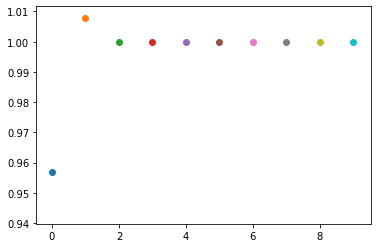

In [80]:
#y = np.dot(Binv,np.ones_like(D)) # start value
sig = 1.2
B = inv(A-sig*np.diag(np.ones_like(D)))
x = np.ones(len(D))

for i in range(10) :
   
    # compute update
    num = np.dot(B,x)

    # compute denominator
    den = sum(abs(num)**2)**(1./2)

    # compute recursion
    x = num/den
    
    # Check sign
    eigV = np.dot(np.transpose(x),np.dot(B,x))/np.dot(np.transpose(x),x)
    
    # update lambda
    lamb = sig + 1/eigV
    
    # update shift point
    sig=np.dot(np.transpose(x),np.dot(A,x))/np.dot(np.transpose(x),x)
    B = inv(A-sig*np.diag(np.ones_like(D)))
    
    # display some stuff & plot fancy
    print('Current evaluation',i,'-->',lamb)
    plt.scatter(i, lamb, marker='o')

print('\nEigenvalue found:')
print(np.round(lamb, 2, out=None))

print('\nCorresponding eigenvector found:')
print(np.round_(x, decimals=2, out=None))

### QR Algorithm
One can ompute all eigenvalues at once using the QR-Algorithm:
Compute the QR decomposition of $A$, i.e.
$$ A_k = Q_k R_k $$
and then apply the iteration rule
$$ A_{k+1} = R_k Q_k $$
which converges to upper diagonal form with the eigenvalues of $A$ in the diagonal.

> Can you compute the eigenvectors once the eigenvalues are known?

Yes! 
1. Through shifted vector iteration, using the now known eigenvalues.
2. Or with $$ Q = \Pi_{k=1} Q_k $$


In [88]:
def eigQR(A, maxIter = 100):
    """ Returns eigenvalues of matrix A using the QR decomposition as a list [lambda1, ..., lambdaN].
        Also returns normalized eigenvectors as column vectors aranged into an array [v1, ..., vN]

    """
    U = A
    
    # compute eigenvalues and eigenvectors
    eigenVecs = np.eye(U.shape[0]) # initialize identity matrix 
    
    for k in range(maxIter):
        
        Q,R = np.linalg.qr(U) # QR decomposition of matrix A
        U = R @ Q # @ operator for matrix multiplication
        eigenVecs = eigenVecs @ Q # compute eigenvector matrix Q = Q_0*Q_1*...*Q_maxIter
    
    return eigenVals, eigenVecs


In [91]:
# test our solver
eigenVals, eigenVecs = eigQR(A) 
sigDigits = 3
print("Our QR-algorithm solver:")
print(np.round(eigenVals,sigDigits))
print(np.round(eigenVecs,sigDigits))

# numpy reference solver 
w,v = np.linalg.eig(A)
print("Numpy reference solver:")
print(np.round(w,sigDigits))
print(np.round(v,sigDigits))

Our QR-algorithm solver:
[1. 2. 3. 4.]
[[-0.556  0.561 -0.45  -0.416]
 [-0.435  0.336  0.823  0.143]
 [ 0.521  0.21   0.322 -0.762]
 [ 0.48   0.727 -0.126  0.475]]
Numpy reference solver:
[1. 4. 3. 2.]
[[ 0.173 -0.556 -0.657  0.368]
 [ 0.737 -0.435 -0.413 -0.68 ]
 [ 0.215  0.521 -0.106  0.065]
 [ 0.617  0.48  -0.622  0.631]]


### Subspace Iteration

Compute an orthonormal basis $X \in \mathbb{C}^{n\times p}$ of $p$ vectors and use it in the iteration
$$ {Z}_{k+1} = {A}{X}_k$$
where 
$$ {X}_k{R}_k = {Z}_k $$
is the QR factorization of $Z_k$.

The largest (in magnitude) eigenvalues appear in the diagonal of $R_k$.

In [ ]:
p = 2 # subspace size -> compute p eigenvalues

# random starting basis
X = np.random.rand(len(D),p)
V = X

# apply the Gram-Schmid process to orthonormalize
for i in range(X.shape[-1]) :
    pass

# perform subspace iterations
for i in range(10) :
    pass

### Submission Task 1: Function for Vector Iteration

Write a function for the vector iteration as well as the iteration for higher eigenvalues using the call-signature given below. 

The function `vector_iteration` takes a matrix $A$ as an input. The function should iterate until the relative norm of the update is smaller than a defined tolerance $\epsilon$, i.e. until 
$$ \frac{\lVert\lambda_{k+1}-\lambda_{k}\rVert}{\lVert\lambda_{k}\rVert} < \epsilon $$

In case of non-convergence after a maximum number of iterations, the function should terminate with a warning.
The function should return the eigenvalue, the corresponding eigenvector as well as the number of iterations. Use the call signature give below, which already contains useful default values for tolerance and maximum number of iterations.

In order to test your function apply use the four matrices

$$ \begin{align} M_1 &= \begin{bmatrix} 4.00554954 & 0.01354906 & 1.19192526 & -1.27636247\\
2.77659659 & 1.49989982 & 3.16264938 & -2.48173559\\
1.45212322 & -0.48865181 & 6.86559345 & -1.8724586\\
4.12225091 & -0.92237257 & 9.49381671 & -2.37104281 \end{bmatrix} \\ M_2 &= \begin{bmatrix} 3.24192625 & -0.39589781 & 0.40929052 & -0.45554814\\
6.59991996 & 4.40135399 & -3.68378817 & -2.75428419\\
3.31265289 & -0.99323334 & 1.59642826 & -1.05449113\\
6.46753364 & 2.21218758 & -2.39903301 & -1.33970849 \end{bmatrix} \\ M_3 &= \begin{bmatrix} -21.9464225 & -21.49193731 & 33.04815917 & 4.13526652\\
31.71210475 & 32.02995084 & -45.84335947 & -5.30095042\\
36.26462491 & 34.35183299 & -50.24609045 & -5.14242071\\
-25.9162961 & -24.95302837 & 37.98407031 & 6.16256212\end{bmatrix} \\ M_4 &= \begin{bmatrix} 2.08819284 & -0.60303119 & 0.32787878 & -0.08233684\\
-0.76907073 & 3.99506513 & -0.08618573 & -1.77753553\\
0.29565465 & -0.86106738 & 2.09849705 & 0.67136912\\
-0.42583356 & 0.58131019 & 0.33550322 & 0.86824497\end{bmatrix} \end{align}, $$

The matrices are given as numpy-arrays below.

In [83]:
M1=np.array([[4.00554954, 0.01354906, 1.19192526, -1.27636247],
 [2.77659659, 1.49989982, 3.16264938, -2.48173559],
 [1.45212322, -0.48865181, 6.86559345, -1.8724586],
 [4.12225091, -0.92237257, 9.49381671, -2.37104281]])

M2=np.array([[3.24192625, -0.39589781, 0.40929052, -0.45554814],
 [6.59991996, 4.40135399, -3.68378817, -2.75428419],
 [3.31265289, -0.99323334, 1.59642826, -1.05449113],
 [6.46753364, 2.21218758, -2.39903301, -1.33970849]])

M3=np.array([[-21.9464225, -21.49193731, 33.04815917, 4.13526652],
 [31.71210475, 32.02995084, -45.84335947, -5.30095042],
 [36.26462491, 34.35183299, -50.24609045, -5.14242071],
 [-25.9162961, -24.95302837, 37.98407031, 6.16256212]])

M4=np.array([[2.08819284, -0.60303119, 0.32787878, -0.08233684],
 [-0.76907073, 3.99506513, -0.08618573, -1.77753553],
 [0.29565465, -0.86106738, 2.09849705, 0.67136912],
 [-0.42583356, 0.58131019, 0.33550322, 0.86824497]])

In [90]:
def vector_iteration(A,eps=1e-10,max_iter=100):
    """Apply vector iteration to matrix A
    
    The algorithm iterates until a relative tolerance `eps` is reached,
    and returns the ??? eigenvalue, corresponding eigenvector and the
    number of iterations.
    
    Parameters
    ----------
    A : array(N,N)
        input matrix
    eps : float
        realtive tolerance
    max_iter : int
        maximum number of iterations
        
    Returns
    -------
    w : float/complex
        the ??? eigenvalue of A
    v : array(N)
        corresponding eigenvector for eigenvalue w
    k : int
        number of iterations
    """
    
    # initialize a starting vector
    x = np.ones(len(A))
    
    # initialize a value for the realtive norm, the previous eigenvalue as well as the iteration counter
    err = 10
    counter = 0
    lambda_prev = 1

    while err > eps and counter < max_iter :
                
        # compute numerator
        num = np.dot(A,x)
        
        # compute denominator
        den = sum(abs(num)**2)**(1./2)
        
        # check sign
        # Not needed, cause good: see https://de.wikipedia.org/wiki/Rayleigh-Quotient
        
        # compute recursion
        x = num/den
        
        # update the relative norm
        lambda_new = den;
        err = abs(lambda_new - lambda_prev)/abs(lambda_prev)
        
        # increment the iteration counter
        counter += 1
        lambda_prev = lambda_new;
        
        # check if we exceed 75 iterations and write a message if it is the case
        if counter > 75 :
            print('Exceeded 75 iterations.')
            
        # DEBUGGING
        #print(num)
        #print(num)
        #print(x)
        #print()
    # end loop
    
    eigenvalue = np.dot(x,np.dot(A,x))/np.dot(x,x)
    eigenvector = x
    iterations = counter
    
    return [eigenvalue, eigenvector, iterations, err]

In [92]:
print(vector_iteration(M1))
# w,v = np.linalg.eig(M1)
# print(w,'\n')

print(vector_iteration(M2))
# w,v = np.linalg.eig(M2)
# print(w,'\n')

print(vector_iteration(M3))
# w,v = np.linalg.eig(M3)
# print(w,'\n')

print(vector_iteration(M4))
# w,v = np.linalg.eig(M4)
# print(w,'\n')

[4.000000006767723, array([-0.55622662, -0.43458467,  0.52119876,  0.47968737]), 70, 9.635381363729208e-11]
Exceeded 75 iterations.
[4.0000000043482675, array([-0.51263192,  0.32656906, -0.78269758, -0.13396141]), 76, 7.533085257504564e-11]
[-39.99999999955286, array([ 0.39076875, -0.5298475 , -0.612742  ,  0.43715975]), 12, 2.1623769442377138e-11]
[3.9999999991408677, array([ 0.33873297, -0.84597746,  0.37836296, -0.16255332]), 34, 7.170797290047376e-11]


## FE-Matrices

### Load the Matrices

Load the system matrices.
The matices are real, square and symmetric with dimension $3N \times 3N$.
The DoFs are arranged in the order $x_1, y_1, z_1, x_2, \dots, z_N$ where $x_i$ denotes the x-displacement of node $i$.

In [19]:
M = mmread('Ms.mtx').toarray() # mass matrix
K = mmread('Ks.mtx').toarray() # stiffness matrix
X = mmread('X.mtx') # coodinate matrix with columns corresponding to x,y,z position of the nodes

N = X.shape[0] # number of nodes

The DoFs in the system matrices are arranged according to a regular grid of linear finite elements.
In the following we determine the unique x, y, and z coodinates of the grid.

In [20]:
nprec = 6 # precision for finding uniqe values
# get grid vectors (the unique vectors of the x,y,z coodinate-grid)
x = np.unique(np.round(X[:,0],decimals=nprec))
y = np.unique(np.round(X[:,1],decimals=nprec))
z = np.unique(np.round(X[:,2],decimals=nprec))
print('Nx =',len(x))
print('Ny =',len(y))
print('Nz =',len(z))
# grid matrices
Xg = np.reshape(X[:,0],[len(y),len(x),len(z)])
Yg = np.reshape(X[:,1],[len(y),len(x),len(z)])
Zg = np.reshape(X[:,2],[len(y),len(x),len(z)])
# or equivalent: Xg,Yg,Zg  = np.meshgrid(x,y,z)

Nx = 28
Ny = 16
Nz = 5


### Plot the Geometry

One can plot the location of the nodes, select subsets of nodes and plot them ...

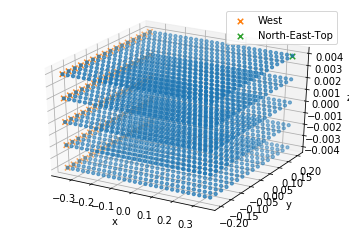

In [21]:
# plot the geometric points 
from mpl_toolkits.mplot3d import Axes3D
fig,ax = plt.subplots(subplot_kw={'projection':'3d'})

#sm = 0.1/mode.max()
ax.scatter(X[:,0],X[:,1],X[:,2],s=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# select nodes on the west-side, i.e. at x=x_min
tol = 1e-12
x_min = X[:,0].min()
Nw = np.argwhere(np.abs(X[:,0]-x_min)<tol) # Node indices of West-Edge nodes

# select node on North-East-Top corner
Nnet = np.argwhere(np.all(np.abs(X-X.max(axis=0))<tol,axis=1))[0]

ax.scatter(X[Nw,0],X[Nw,1],X[Nw,2],s=30,marker='x',label='West')
ax.scatter(X[Nnet,0],X[Nnet,1],X[Nnet,2],s=30,marker='x',label='North-East-Top')
ax.legend()

### Solve a Static Problem

Solve a static problem applying nodal forces to the North-East-Top corner and fixing all DoF at the West-Edge of the plate.

We solve the system
$$ K u = f $$
for the displacements $u$.
The system needs to be constrained, thus, we select nodes which will be removed from the system.

In [22]:

# because the dofs are ordered as x_1, y_1, z_1, x_2, ..., z_N in the global system, the x, y, and z dofs for node n are
# located at position 3n, 3n+1, 3n+2.

# indices of x, y, and z DoFs in the global system
# can be used to get DoF-index in global system, e.g. for y of node n by Iy[n]
Ix = np.arange(N)*3 # index of x-dofs
Iy = np.arange(N)*3+1
Iz = np.arange(N)*3+2

# select which indices in the global system must be constrained
If = np.array([Ix[Nw],Iy[Nw],Iz[Nw]]).ravel() # dof indices of fix constraint
Ic = np.array([(i in If) for i in np.arange(3*N)]) # boolean array of constraind dofs

# construct forcing vector
f = np.zeros(3*N)
f[Iz[Nnet]] = -1.0

# compute the reduced system
Kc = K[np.ix_(~Ic,~Ic)]
fc = f[~Ic]

# compute solution
u = np.zeros(3*N) # initialize displacement vector

# solve the linear system Kc*uc=fc
uc = np.linalg.solve(Kc,fc)

# sort solution in large vector
u[~Ic] = uc

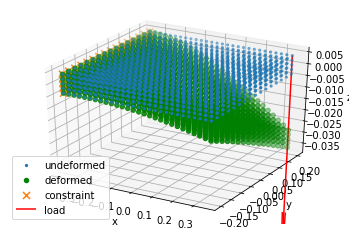

In [23]:
# plot in 3D
fig,ax = plt.subplots(subplot_kw={'projection':'3d'})

#sm = 0.1/mode.max()
ax.scatter(X[:,0],X[:,1],X[:,2],s=5,label='undeformed') # undeformed

# format U like X
U = np.array([u[Ix],u[Iy],u[Iz]]).T

# scale factor for plotting
s = 0.5/np.max(np.sqrt(np.sum(U**2,axis=0)))
Xu = X + s*U # defomed configuration (displacement scaled by s)

ax.scatter(Xu[:,0],Xu[:,1],Xu[:,2],c='g',label='deformed')
ax.scatter(X[Nw,0],X[Nw,1],X[Nw,2],s=50,marker='x',label='constraint')
ax.quiver(X[:,0],X[:,1],X[:,2],f[Ix],f[Iy],f[Iz],color='r',length=0.1,label='load')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

Text(0, 0.5, 'y')

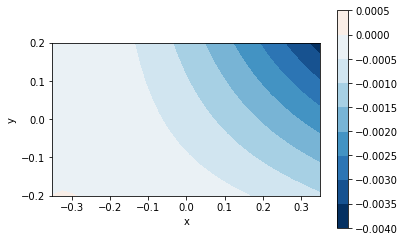

In [24]:
# plot in 2D (z-displacement of the top-nodes)

# select nodes
Nt = np.argwhere(np.abs(X[:,2]-X[:,2].max())<tol)
# extract z-displacements
uz = np.reshape(u[Iz[Nt]],[len(y),len(x)])

lim = np.max(np.abs(uz)) # limit to center color legend around 0

fig,ax = plt.subplots()
cax = ax.contourf(x,y,uz,cmap=plt.get_cmap('RdBu_r'),vmin=-lim,vmax=lim)
fig.colorbar(cax,extend='both')#,orientation='horizontal')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

### Submission Task 2: Compute eigenvalues and modeshapes

#### All free
In the first step, use the unconstrained system to compute the first 15 eigenmodes and plot them. In order to compute only the first $k$ modes use the code

```
# only compute a subset of modes
from scipy.linalg import eigh
k = 15
W,V = eigh(K,M,eigvals=(0,k))
``` 
for the plots of the eigenmodes you can use the function given below.

In [29]:
def plotmodes(V) :
    for i,v in enumerate(V.T) : # iterate over eigenvectors
        c = np.reshape(v[Iz[Nt]],[len(y),len(x)])
        lim = np.max(np.abs(c))
        fig,ax = plt.subplots(figsize=[3.5,2])
        ax.contourf(x,y,c,cmap=plt.get_cmap('RdBu'),vmin=-lim,vmax=lim)
        ax.set_aspect('equal')
        ax.set_title('Mode %i @ %f Hz'%(i+1,sqrt(W[i])/2/math.pi))
        ax.set_xticks([])
        ax.set_yticks([])
        fig.tight_layout()

/Users/1llionaire/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


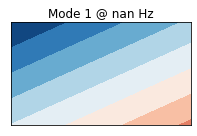

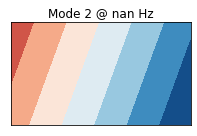

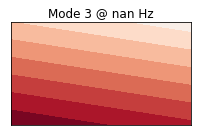

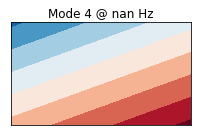

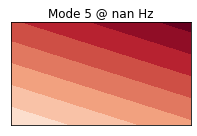

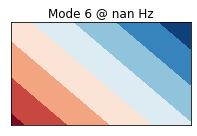

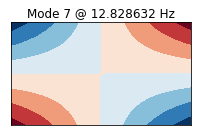

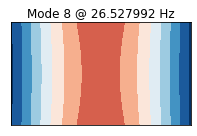

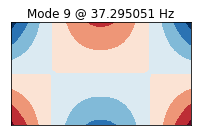

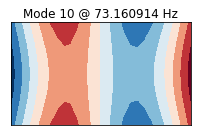

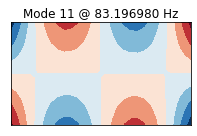

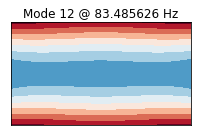

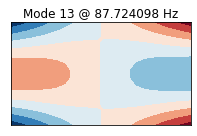

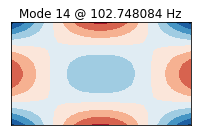

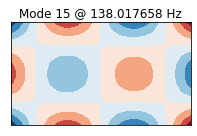

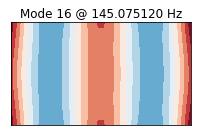

In [30]:
# only compute a subset of modes
import math
from scipy.linalg import eigh
k = 15
W,V = eigh(K,M,eigvals=(0,k))

plotmodes(V)

#### Short side clamped
In the next step constrain the nodes of the short edge on the north-west side ($Nw$), compute the first 15 eigenmodes and plot them like in the previous task.

/Users/1llionaire/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


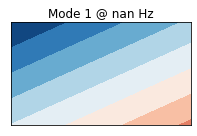

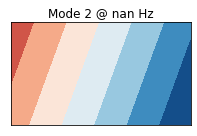

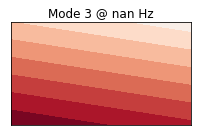

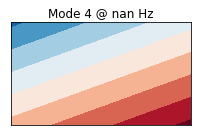

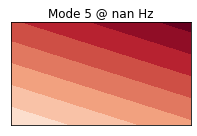

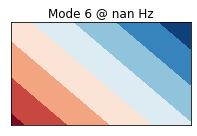

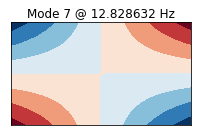

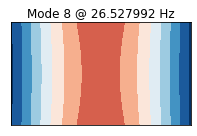

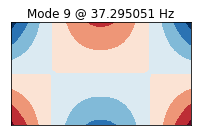

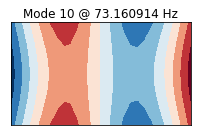

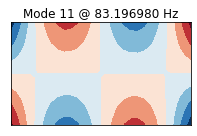

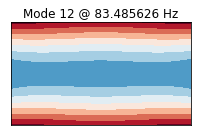

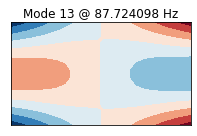

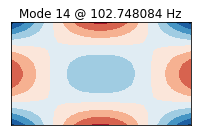

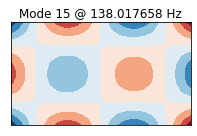

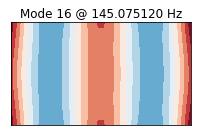

In [31]:
# select nodes on the west-side, i.e. at x=x_min
tol = 1e-12
x_min = X[:,0].min()
Nw = np.argwhere(np.abs(X[:,0]-x_min)<tol) # Node indices of West-Edge nodes

# only compute a subset of modes
import math
from scipy.linalg import eigh
k = 15
W,V = eigh(K,M,eigvals=(0,k))

plotmodes(V)

#### Clamped edges
In the last step all edges of the plate should be clamped ($Nn,No,Ns,Nw$). Compute the first 15 eigenmodes and plot them like in the previous tasks.